# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
from sklearn.model_selection import train_test_split

## (1) 데이터 가져오기

    - sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    - diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [66]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

## (2) 모델에 입력할 데이터 X 준비하기

    - df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [67]:
df_X = diabetes.data

In [68]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [69]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [70]:
df_x = pd.DataFrame(df_X,columns=diabetes.feature_names)

## (3) 모델에 예측할 데이터 y 준비하기

In [71]:
df_Y = diabetes.target

In [72]:
df_y = pd.DataFrame(df_Y,columns=['target'])

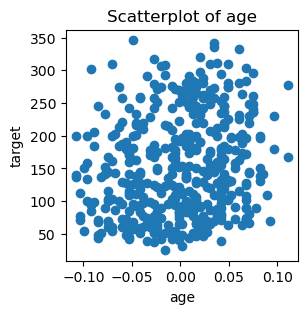

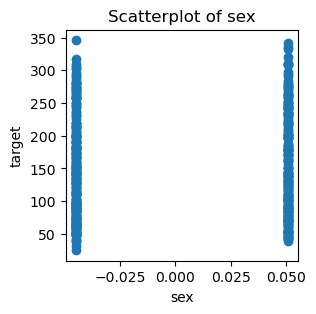

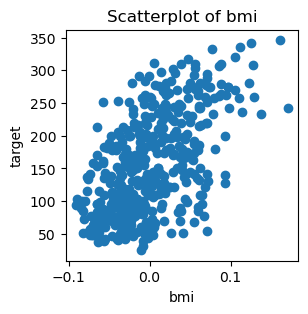

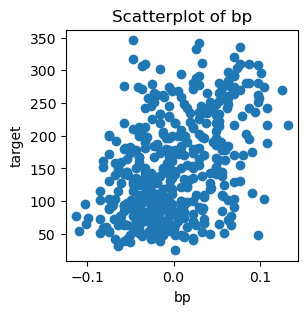

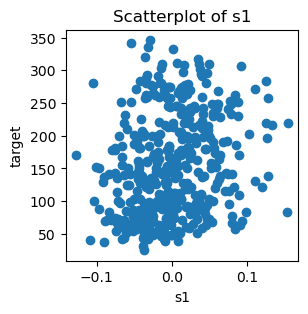

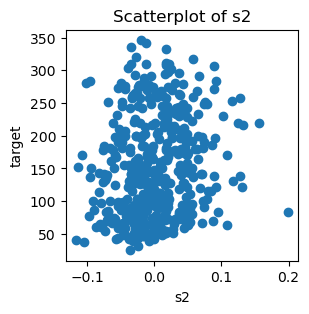

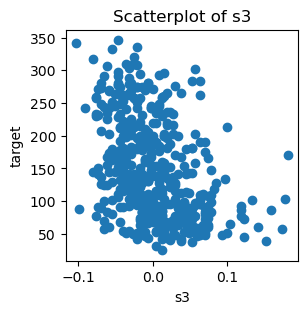

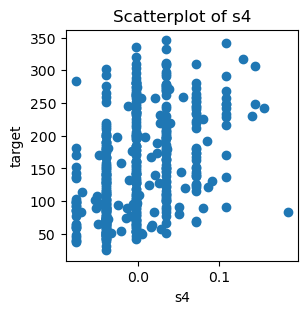

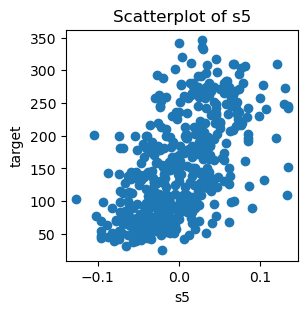

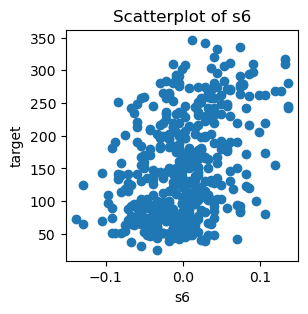

In [73]:
for col in df_x.columns:
    plt.figure(figsize=(3,3))
    plt.scatter(df_x[col],df_y['target'])
    plt.xlabel(col)
    plt.ylabel('target')
    plt.title('Scatterplot of {}'.format(col))
    plt.show()


선형 관계가 있는 데이터 피쳐 : df_x[['bmi','s5','s6','bp','age','s3']]

In [74]:
# df_x = df_x[['bmi','s5','s6','bp','age','s3']]
# df_X = df_x.to_numpy()

## (4) train 데이터와 test 데이터로 분리하기

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.2, random_state=36)

## (5) 모델 준비하기

    - 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.모델 함수를 구현해주세요.

In [76]:
def model(x, w, b):
    y = np.sum(w * x, axis=-1) + b
    return y

## (6) 손실함수 loss 정의하기

In [77]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [78]:
def RMSE(a,b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [79]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L


In [80]:
def loss2(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L


## (7) 기울기를 구하는 gradient 함수 구현하기

In [81]:
def gradient(x, w, b, y):
    dw = np.zeros_like(w)
    for i in range(len(w)):
        w_tmp = np.copy(w)
        w_tmp[i] += 0.0001
        dw[i] = (loss(x, w_tmp, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [82]:
def gradient_analytic(x, w, b, y):
    N = len(x)
    
    # 모델의 예측값 계산
    y_pred = model(x, w, b)
    
    # w에 대한 기울기
    dw = -2/N * np.dot(x.T, (y - y_pred))
    
    # b에 대한 기울기
    db = -2/N * np.sum(y - y_pred)
    
    return dw, db

In [83]:
def gradient2(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db



## (8) 하이퍼 파라미터인 학습률 설정하기

In [84]:
lr = 0.001

## (9) 모델 학습하기

In [85]:
losses=[]
weight_history=[]
bias_history=[]

In [86]:
#w = np.ones(df_X.shape[1])
w = np.random.rand(df_X.shape[1])
b = 0

Iteration 1000 : Loss 6462.7818
Iteration 2000 : Loss 5971.9154
Iteration 3000 : Loss 5885.2980
Iteration 4000 : Loss 5808.5988
Iteration 5000 : Loss 5734.5336
Iteration 6000 : Loss 5662.8820
Iteration 7000 : Loss 5593.5553
Iteration 8000 : Loss 5526.4707
Iteration 9000 : Loss 5461.5483
Iteration 10000 : Loss 5398.7110
Iteration 11000 : Loss 5337.8847
Iteration 12000 : Loss 5278.9982
Iteration 13000 : Loss 5221.9824
Iteration 14000 : Loss 5166.7713
Iteration 15000 : Loss 5113.3009
Iteration 16000 : Loss 5061.5097
Iteration 17000 : Loss 5011.3385
Iteration 18000 : Loss 4962.7302
Iteration 19000 : Loss 4915.6297
Iteration 20000 : Loss 4869.9842
Iteration 21000 : Loss 4825.7425
Iteration 22000 : Loss 4782.8555
Iteration 23000 : Loss 4741.2758
Iteration 24000 : Loss 4700.9576
Iteration 25000 : Loss 4661.8571
Iteration 26000 : Loss 4623.9318
Iteration 27000 : Loss 4587.1409
Iteration 28000 : Loss 4551.4450
Iteration 29000 : Loss 4516.8061
Iteration 30000 : Loss 4483.1879
Iteration 31000 : L

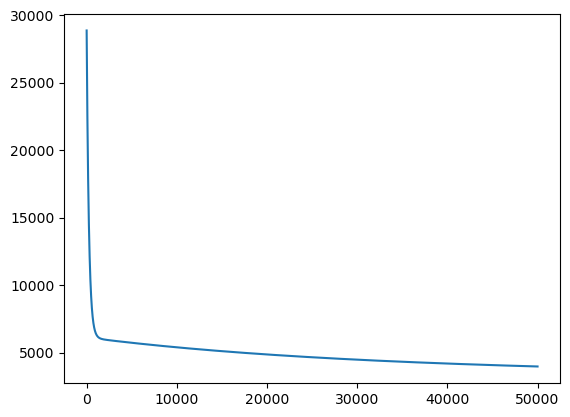

In [87]:
losses = []

for i in range(1, 50001):
    dW, db = gradient2(X_train, w, b, y_train)
    w -= lr * dW
    b -= lr * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)                # loss 값 기록
    weight_history.append(w)
    bias_history.append(b)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

In [59]:
for i in range(1, 700000):
  #  dw, db = gradient(X_train, w, b, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    dw, db = gradient2(X_train, w, b, y_train)
    w -= lr * dw         # 5번: w = w - η * dw 로 업데이트
    b -= lr * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(X_train, w, b, y_train)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    weight_history.append(w)
    bias_history.append(b)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 5398.9129
Iteration 20000 : Loss 4870.4844
Iteration 30000 : Loss 4483.8683
Iteration 40000 : Loss 4196.7660
Iteration 50000 : Loss 3979.9692
Iteration 60000 : Loss 3813.2584
Iteration 70000 : Loss 3682.5928
Iteration 80000 : Loss 3578.1824
Iteration 90000 : Loss 3493.1664
Iteration 100000 : Loss 3422.7064
Iteration 110000 : Loss 3363.3629
Iteration 120000 : Loss 3312.6677
Iteration 130000 : Loss 3268.8292
Iteration 140000 : Loss 3230.5294
Iteration 150000 : Loss 3196.7838
Iteration 160000 : Loss 3166.8449
Iteration 170000 : Loss 3140.1346
Iteration 180000 : Loss 3116.1974
Iteration 190000 : Loss 3094.6680
Iteration 200000 : Loss 3075.2480
Iteration 210000 : Loss 3057.6895
Iteration 220000 : Loss 3041.7836
Iteration 230000 : Loss 3027.3520
Iteration 240000 : Loss 3014.2406
Iteration 250000 : Loss 3002.3152
Iteration 260000 : Loss 2991.4580
Iteration 270000 : Loss 2981.5645
Iteration 280000 : Loss 2972.5423
Iteration 290000 : Loss 2964.3086
Iteration 300000 : Loss

## (10) test 데이터에 대한 성능 확인하기

Training Loss: 3979.1412
Test Loss: 3526.4064
Training RMSE: 63.0804
Test RMSE: 59.3836


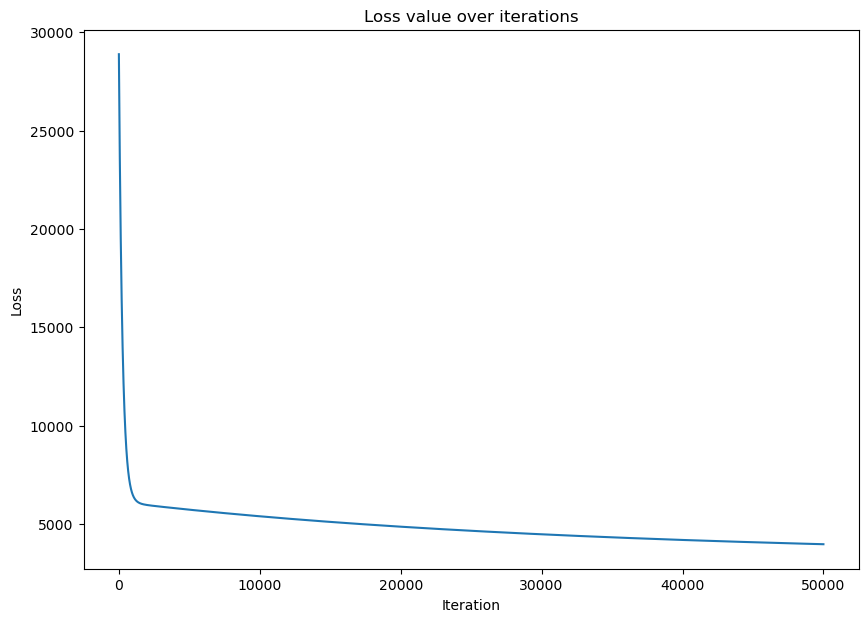

In [88]:
# Calculate and print the loss on the training set
train_loss = loss(X_train, w, b, y_train)
print(f'Training Loss: {train_loss:.4f}')

# Calculate and print the loss on the test set
test_loss = loss(X_test, w, b, y_test)
print(f'Test Loss: {test_loss:.4f}')

# Calculate and print the RMSE on the training set
train_rmse = loss2(X_train, w, b, y_train)
print(f'Training RMSE: {train_rmse:.4f}')

# Calculate and print the RMSE on the test set
test_rmse = loss2(X_test, w, b, y_test)
print(f'Test RMSE: {test_rmse:.4f}')

# Plot the loss values
plt.figure(figsize=(10, 7))
plt.plot(losses)
plt.title('Loss value over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

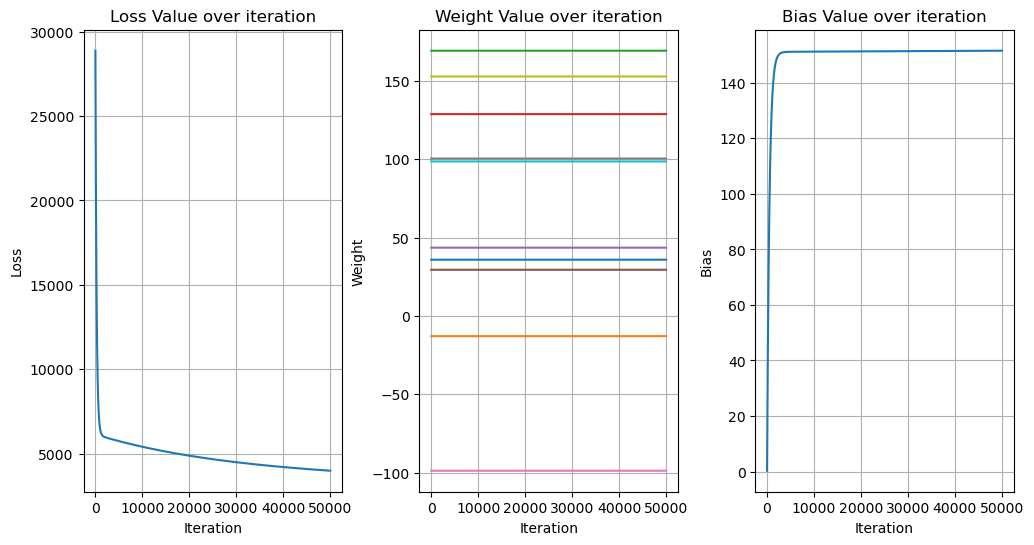

In [89]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].plot(losses)
ax[0].set_title('Loss Value over iteration')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].grid()

ax[1].plot(weight_history)
ax[1].set_title('Weight Value over iteration')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Weight')
ax[1].grid()


ax[2].plot(bias_history)
ax[2].set_title('Bias Value over iteration')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Bias')
ax[2].grid()

plt.subplots_adjust(wspace=0.3)  # Adjust the width space

plt.show()

## (11) 정답 데이터와 예측한 데이터 시각화하기

    - x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

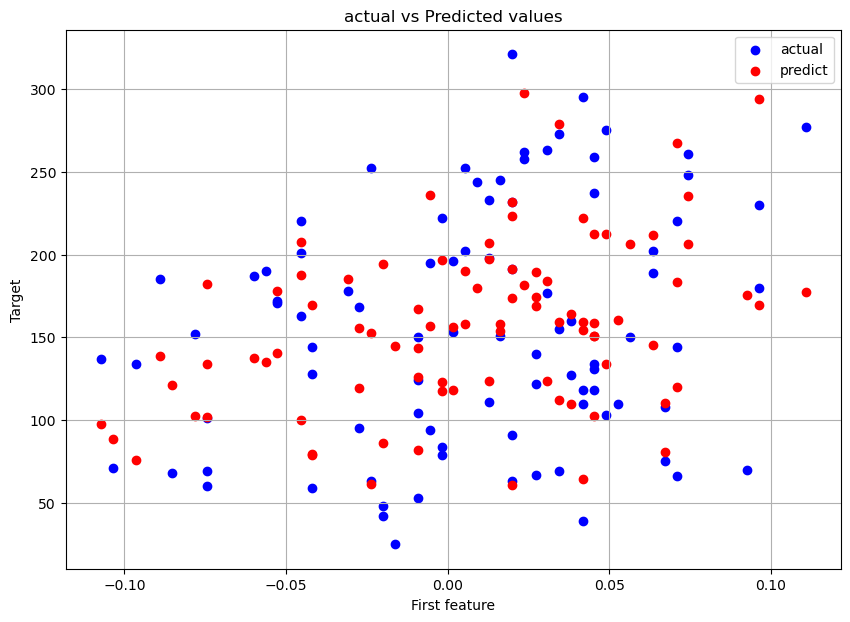

In [28]:
y_pred = model(X_test, w, b)


plt.figure(figsize=(10, 7))
plt.scatter(X_test[:, 0], y_test, color='blue', label='actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='predict')
plt.title('actual vs Predicted values')
plt.xlabel('First feature')
plt.ylabel('Target')
plt.grid()
plt.legend()
plt.show()